In [1]:
import cfbd
import pandas as pd
from cfbd.models.play import Play
from sklearn import linear_model
from sklearn.cluster import HDBSCAN, KMeans
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
plays_df = pd.read_csv('plays.csv')
plays_df.drop(columns = ['Unnamed: 0', '0'], inplace = True)

In [3]:
def play_type_converter(x):
    y=0
    if x == 'Pass Incompletion':
        y = 'Pass'
    elif x == 'Pass Reception':
        y = 'Pass'
    elif x == 'Rush':
        y = 'Rush'
    elif x == 'Punt':
        y = 'Punt'
    elif x == 'Pass Touchdown':
        y = 'Pass'
    elif x == 'Field Goal Missed':
        y = 'Kick'
    elif x == 'Rushing Touchdown':
        y = 'Rush'
    elif x == 'Field Goal Good':
        y = 'Kick'
    return y
plays_df['type_conv'] = plays_df['play_type'].apply(play_type_converter)

In [4]:
plays_df_mask = (plays_df['type_conv'] == 'Rush') | (plays_df['type_conv'] == 'Pass')
plays_df = plays_df.loc[plays_df_mask]

In [7]:
X = plays_df[['down', 'distance']]

In [8]:
def optimize(data, max_k):
    means = []
    inertias = []
    for k in range(1, max_k):
        kmeans= KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias)
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()


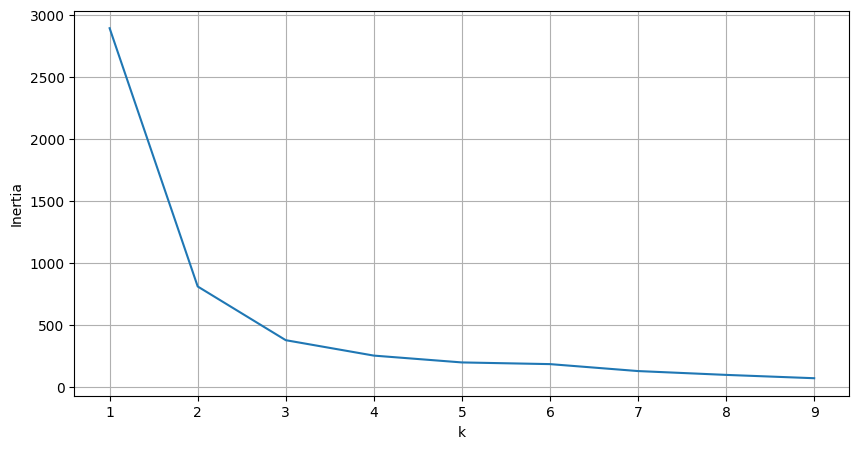

In [9]:
optimize(X,10)

In [10]:
kmeans= KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [11]:
X['labels'] = kmeans.labels_

C:\Users\Drews\AppData\Local\Temp\ipykernel_8984\1170755035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['labels'] = kmeans.labels_


<function matplotlib.pyplot.show(close=None, block=None)>

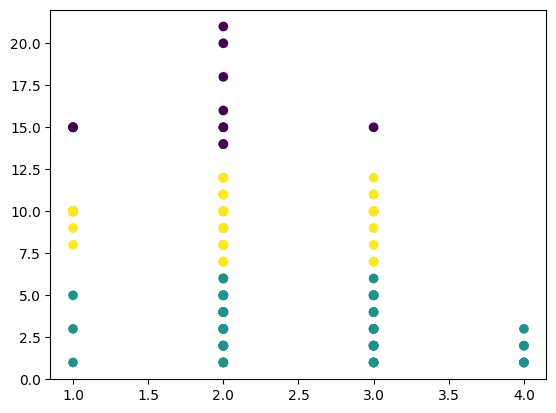

In [12]:
plt.scatter(x = X['down'], y=X['distance'], c = X['labels'])
plt.show